# <span style="color:darkblue"> QTM 151 - Quiz 2 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [1]:
# Write your answer here
print('tkhossa')



tkhossa


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [3]:
# Write your answer here:

print('I will abide by Emorys code of conduct')


I will abide by Emorys code of conduct


<font size = "5">

Import the libraries "numpy", "matplotlib.pyplot", <br>
"pandas", "statsmodels.api" and "statsmodels.formula.api"


In [5]:
# Write your answer here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

<font size = "5">

Read the dataset "data_quiz/fifa23_players_basic.csv"

- It's a dataset on professional soccer players
- Rows correspond to players (18,539)
- Columns contain attributes of players (32)
- Try to view the dataset before starting <br>
to get a sense of its content

In [7]:
# Write your own code
fifa = pd.read_csv("data_quiz/fifa23_players_basic.csv")
print(fifa.dtypes)
fifa.head()



Unnamed: 0                      int64
Known As                       object
Full Name                      object
Overall                         int64
Potential                       int64
Value(in Euro)                  int64
Positions Played               object
Best Position                  object
Nationality                    object
Image Link                     object
Age                             int64
Height(in cm)                   int64
Weight(in kg)                   int64
TotalStats                      int64
BaseStats                       int64
Club Name                      object
Wage(in Euro)                   int64
Release Clause                  int64
Club Position                  object
Contract Until                 object
Club Jersey Number             object
Joined On                       int64
On Loan                        object
Preferred Foot                 object
Weak Foot Rating                int64
Skill Moves                     int64
Internationa

,Unnamed: 0,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,...,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
0,0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,...,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low
1,1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,...,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium
2,2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,...,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium
3,3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,...,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High
4,4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,...,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low


<font size = "5">

(a) Use queries + global variables

<font size = "3">

- Subset the players whose value of the column "On Loan" is "YES" <br>
and store it in a new dataset
- How many players are on loan?

HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
and when the value is a string. <br>
Reference the column as ``` `On Loan` ``` inside .query()

In [15]:
# Write your own code

loanstatus = 'YES'
onLoan = fifa.query("`On Loan` == @loanstatus")
onLoan.shape

print('1229 players are on loan')


1229 players are on loan


<font size = "5">

(b) Create a function and apply it to a column <br>

<font size = "3">

Step 1:
- Define a function with a parameter "Overall"
- If "Overall > 90", classification = "Top Performer"
- If "Overall <= 90", classification = "Non Top-Performer"
- The function returns "classification"

Step 2:
- Extract the column "Overall" in the dataset <br>
(be carefeful to write the "O" capitalized)
- Create a new variable called "player_classification" <br>
to assign each player to the correct classification

HINT: Use the ".apply()" function

In [17]:
# Write your own code

def topPerformer(rating):
    if rating > 90:
        classification = "Top Performer"
    elif rating <= 90:
        classification = "Non Top-Performer"
    return classification

fifa['player_classification'] = fifa['Overall'].apply(topPerformer)

<font size = "5">

(c) Use sorting + ".iloc[]"

<font size = "3">

The varable "Joined On" shows the date in which each player joined FIFA
- Use ".sort_values()" to order the "Joined On" column <br>
from earlier data to later date
- Get a subset with the 6 players in the dataset <br>
who joined FIFA earliest
- From this subset, display the year in which they joined <br>
by displaying the column "Joined On"

In [24]:
# Write your own code
fifaSorted = fifa.sort_values(by= 'Joined On', ascending=False)
fifaEarliest = fifaSorted.iloc[0:6]
print(fifaEarliest['Joined On'])

12305    2022
15678    2022
5252     2022
5251     2022
15670    2022
15671    2022
Name: Joined On, dtype: int64


<font size = "5">

(d) Regression function

<font size = "3">

- Run a regression of "Potential" (left-hand side) on "Age" (right-hand side)
- What are the values of the coefficients?

[HINT: Use the commands ```smf.ols()``` and ```.fit()``` and ```.params``` <br>
from Lecture 11 ]


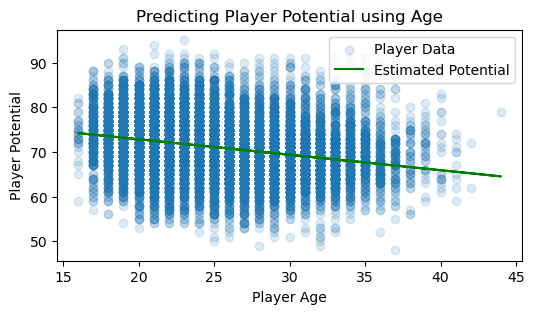

In [77]:
# Write your own code
model = smf.ols(formula= 'Potential ~ Age', data = fifa)
results = model.fit()

fifa['estimated_potential'] = results.params[0] + results.params[1] * fifa['Age']

plt.figure(figsize=(6,3))
plt.scatter(x = fifa['Age'], y = fifa['Potential'],alpha = 0.15)
plt.plot(fifa['Age'],fifa['estimated_potential'], color = 'green')
plt.legend(labels = ["Player Data", "Estimated Potential"])
plt.xlabel("Player Age")
plt.ylabel("Player Potential")
plt.title("Predicting Player Potential using Age")
plt.show()

<font size = "5">

(e) Split a dataset into subsets

<font size = "3">

- Store the total number of rows of the dataset in a variable called ```n``` <br>
- Create a new variable called ```random_var``` drawn from a <br>
uniform distribution between 0 and 1 with size ```n```
- Use .query() to subset all observations with ```random_var <0.5```.<br>
store it in a new dataset called "data0"
- Use .query() to subset all observations with ```random_var >= 0.5```.<br>
store it in a new dataset called "data1"

[HINT: See Lecture 2 for how to generate a uniform random variable]


In [54]:
# Write your own code
n = fifa.index.size
fifa['random_var'] = np.random.uniform(0,1,n)

data0 = fifa.query('random_var < 0.5')
data1 = fifa.query('random_var >= 0.5')

<font size = "5">

(f) Create two overlapping histogram plots

<font size = "3">

- This question requires the two datasets you created in (e)
- Display the distribution of "Age" for "data0" and "data1" using <br>
```plt.hist()```
- You will need to label the axes, and the title
- To get full points, plot the histograms with the option  ```alpha = 0.5```, e.g. <br>
 ``` plt.hist(x = ..., alpha = 0.5) ``` <br>
 Make sure to substitute the corresponding "x" vector instead of ```...``` <br>
(The alpha option sets the transparency of the histogram )

Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

Text(0.5, 1.0, 'Distribution of Age')

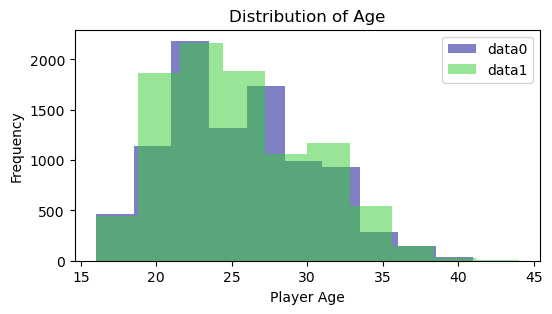

In [76]:
# Write your own code
plt.figure(figsize=(6,3))
plt.hist(data0['Age'],alpha=0.5,color='darkblue',label="data0")
plt.hist(data1['Age'],alpha=0.5,color='limegreen',label="data1")
plt.legend()
plt.xlabel("Player Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")



